# **1.Import Required Libraries**


In [75]:
# Basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import re
import nltk

# NLTK tools for text preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sklearn tools for splitting data and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\91860/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **2. Load and Inspect the Dataset**

In [44]:
#Load the Dataset
data=pd.read_csv('C:/data science material/project_7/Notebook/data/twitter_disaster.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [62]:
# Display basic info and first few rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7613 non-null   int64 
 1   keyword       7552 non-null   object
 2   location      5080 non-null   object
 3   text          7613 non-null   object
 4   target        7613 non-null   int64 
 5   cleaned_text  7613 non-null   object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB


In [ ]:
data.head()

# **3. Data Cleaning**

In [46]:
# Initialize lemmatizer and stopword list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize text
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

# Apply text cleaning to the dataset
data['cleaned_text'] = data['text'].apply(clean_text)

# Display cleaned data
print(data[['text', 'cleaned_text']].head())


                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked shelter place notified officer ...  
3  people receive wildfire evacuation order calif...  
4  got sent photo ruby alaska smoke wildfire pour...  


# **4. Tokenization and Padding**

In [47]:
# Define features (X) and labels (y)
X = data['cleaned_text'].values
y = data['target'].values

# Tokenization: Convert text to sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Top 10,000 words
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Padding and truncating: Make all sequences the same length
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')


# **5. Split the Dataset**

In [48]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


# **6. Build the Bidirectional LSTM Model**

In [49]:
# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),  # Embedding layer
    Bidirectional(LSTM(64, return_sequences=True)),  # First LSTM layer (bidirectional)
    Dropout(0.2),  # Dropout to prevent overfitting
    Bidirectional(LSTM(32)),  # Second LSTM layer (bidirectional)
    Dropout(0.2),  # Another dropout layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


c:\data science material\project_7\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **7. Compile the Model**

In [50]:
# Compile the model with loss function, optimizer, and metric
model.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',  # Adaptive optimizer
    metrics=['accuracy']  # Metric to monitor
)


# **8. Train the Model**

In [51]:
# Train the model on training data and validate on testing data
history = model.fit(
    X_train, y_train, 
    epochs=5,  # Number of training epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test)  # Validation data
)


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.6286 - loss: 0.6340 - val_accuracy: 0.8076 - val_loss: 0.4500
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.8713 - loss: 0.3274 - val_accuracy: 0.7827 - val_loss: 0.4698
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9279 - loss: 0.2144 - val_accuracy: 0.7873 - val_loss: 0.5310
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9495 - loss: 0.1666 - val_accuracy: 0.5739 - val_loss: 0.6819
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7307 - loss: 0.5119 - val_accuracy: 0.7682 - val_loss: 0.7291


# **9. Evaluate the Model**

In [52]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       874
           1       0.78      0.64      0.70       649

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.76      1523

Accuracy Score: 0.768220617202889


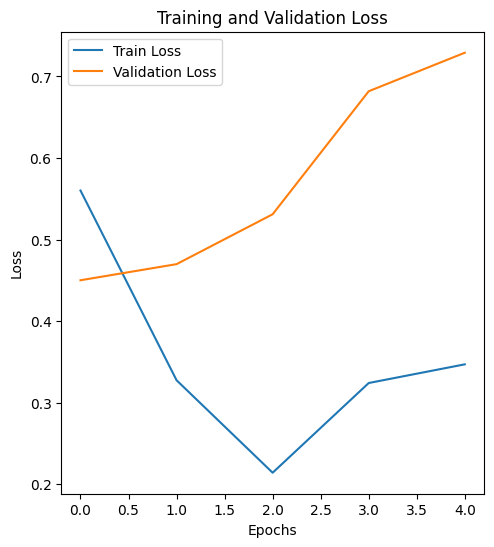

In [53]:
import matplotlib.pyplot as plt
# Plot training & validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Analysis of Training and Validation Loss

### Observations:
- **Training Loss**: The training loss decreases initially and stabilizes, indicating that the model is effectively learning from the training data.
- **Validation Loss**: The validation loss decreases initially, but after epoch 2, it starts to increase. This behavior suggests that the model is beginning to overfit the training data. When the model performs well on the training set but starts to perform poorly on the validation set, it indicates that it is not generalizing well to unseen data.
- **Gap Between Training and Validation Loss**: The widening gap between the training and validation loss over epochs is a clear indicator of **overfitting**. As the model learns the training data better, it begins to memorize it, rather than generalize well to new, unseen data.

### Solutions to Address Overfitting:
To prevent the model from overfitting, we can apply several techniques:
1. **Regularization**: Apply regularization techniques such as L2 regularization to penalize large weights in the model.
2. **Dropout**: Introduce dropout layers into the model to randomly deactivate a portion of the neurons during training, which helps prevent overfitting by forcing the model to rely on multiple paths to make predictions.
3. **Early Stopping**: Implement early stopping, which monitors the validation loss during training and stops the training process when the validation loss stops improving for a specified number of epochs. This prevents the model from training too long and overfitting.

### Conclusion:
By applying these solutions, improve the model's ability to generalize, ensuring that it performs well not just on the training data, but also on unseen data.


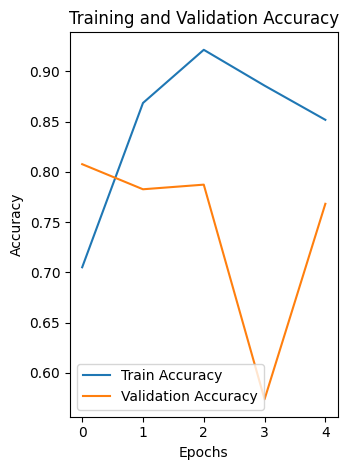

In [54]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Show the plots
plt.tight_layout()
plt.show()

- Training accuracy improves initially, peaks at epoch 2, and then slightly drops, suggesting overfitting.  
- Validation accuracy decreases sharply after epoch 2, indicating poor generalization.  
- Overfitting is evident; consider regularization, early stopping, or simplifying the model.  


# **10. Save the Model**

In [55]:
# Save the trained model for future use
model.save("disaster_tweet_classifier.h5")


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from sklearn.metrics import classification_report, accuracy_score


**Initialize Dictionary to Track Models and Accuracy**

In [57]:
# Dictionary to store models and their evaluation metrics (accuracy)
model_accuracies = {}


**Define the Function to Build and Train Models**

In [89]:
# Function to build and train models
def build_and_train_model(model_type, X_train, y_train, X_test, y_test, max_len=100):
    # Initialize the model
    model = Sequential()
    
    # Add the embedding layer for text data
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))

    # Add model-specific layers based on model_type
    if model_type == "RNN":
        # Add SimpleRNN layers for sequential data processing
        model.add(SimpleRNN(64, return_sequences=True))  # 64 units, returns sequences for next RNN layer
        model.add(Dropout(0.2))  # Dropout to prevent overfitting
        model.add(SimpleRNN(32))  # Another SimpleRNN layer with 32 units
        
    elif model_type == "ANN":
        # Flatten the embedding output for feeding into dense layers
        model.add(Flatten())  
        model.add(Dense(128, activation='relu'))  # First dense layer with 128 units
        model.add(Dropout(0.3))  # Dropout to prevent overfitting
        model.add(Dense(64, activation='relu'))  # Second dense layer with 64 units
        
    elif model_type == "CNN":
        # Add Conv1D layers for feature extraction from text sequences
        model.add(Conv1D(128, kernel_size=3, activation='relu'))  # First Conv1D layer with 128 filters
        model.add(MaxPooling1D(pool_size=2))  # Max pooling to down-sample the data
        model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Second Conv1D layer with 64 filters
        model.add(MaxPooling1D(pool_size=2))  # Max pooling again
        model.add(Flatten())  # Flatten the output from Conv1D layers into a 1D vector

    # Add common output layers after model-specific layers
    model.add(Dense(32, activation='relu'))  # Fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Predictions
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy score

    # Print evaluation metrics
    print(f"Model: {model_type}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model, accuracy


In [90]:
# Train and evaluate RNN, ANN, and CNN models
models_to_build = ["RNN", "ANN", "CNN"]  # List of model types to build
for model_type in models_to_build:
    print(f"Building and training {model_type} model...")  # Print which model is being built
    model, accuracy = build_and_train_model(model_type, X_train, y_train, X_test, y_test)  # Train the model
    model_accuracies[model_type] = {"model": model, "accuracy": accuracy}  # Store the model and its accuracy


Building and training RNN model...
Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5706 - loss: 0.6865 - val_accuracy: 0.5634 - val_loss: 0.6900
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5638 - loss: 0.6862 - val_accuracy: 0.5148 - val_loss: 0.6993
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5580 - loss: 0.6890 - val_accuracy: 0.5594 - val_loss: 0.6860
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.5621 - loss: 0.6881 - val_accuracy: 0.5739 - val_loss: 0.6832
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5375 - loss: 0.6906 - val_accuracy: 0.5739 - val_loss: 0.6823
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Model: RNN
Accuracy: 0.5738673670387393
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
 

c:\data science material\project_7\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\data science material\project_7\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\data science material\project_7\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5812 - loss: 0.6681 - val_accuracy: 0.8050 - val_loss: 0.4469
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8676 - loss: 0.3295 - val_accuracy: 0.7892 - val_loss: 0.4733
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9470 - loss: 0.1546 - val_accuracy: 0.7748 - val_loss: 0.6001
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9677 - loss: 0.0975 - val_accuracy: 0.7774 - val_loss: 0.6365
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9795 - loss: 0.0607 - val_accuracy: 0.7787 - val_loss: 0.7646
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model: ANN
Accuracy: 0.7787261982928431
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       874
           1       0.76      0.70      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      

c:\data science material\project_7\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6243 - loss: 0.6427 - val_accuracy: 0.7866 - val_loss: 0.4659
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8677 - loss: 0.3282 - val_accuracy: 0.7971 - val_loss: 0.4734
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9359 - loss: 0.1806 - val_accuracy: 0.7695 - val_loss: 0.5784
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9700 - loss: 0.0955 - val_accuracy: 0.7551 - val_loss: 0.7335
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9810 - loss: 0.0638 - val_accuracy: 0.7472 - val_loss: 0.8289
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model: CNN
Accuracy: 0.747209455022981
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       874
           1       0.71      0.68      0.70       649

    accuracy                           0.75      1523
   macro avg       0.74      0.74      0.74      1

 # **Save the Best Model Based on Accuracy**

In [60]:
# Find the best model based on the highest accuracy
best_model_type = max(model_accuracies, key=lambda x: model_accuracies[x]['accuracy'])  # Get model with highest accuracy
best_model = model_accuracies[best_model_type]["model"]  # Retrieve the best model
best_accuracy = model_accuracies[best_model_type]["accuracy"]  # Retrieve the accuracy of the best model

# Print the best model and its accuracy
print(f"Best Model: {best_model_type} with Accuracy: {best_accuracy}")

# Save the best model to a file (HDF5 format)
best_model.save(f"best_model_{best_model_type}.h5")  # Save the best-performing model


Best Model: ANN with Accuracy: 0.7695338148391333


In [74]:
# Function to visualize the training process
def visualize_training(history):
    
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

In [64]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
# Build the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))

c:\data science material\project_7\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [66]:
# Add RNN layer with L2 regularization
model.add(SimpleRNN(64, return_sequences=True, 
                    kernel_regularizer=regularizers.l2(0.01)))  # Apply L2 regularization
model.add(Dropout(0.3))  # Add Dropout to prevent overfitting


In [67]:
# Add another RNN layer
model.add(SimpleRNN(32))


In [68]:
# Add Dense layers
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model.add(Dropout(0.3))  # Dropout layer

In [69]:
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [70]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [72]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Using early stopping
    verbose=1
)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.5509 - loss: 1.4346 - val_accuracy: 0.4688 - val_loss: 0.8892
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5583 - loss: 0.7951 - val_accuracy: 0.5739 - val_loss: 0.7136
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5725 - loss: 0.7040 - val_accuracy: 0.5739 - val_loss: 0.6905
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5590 - loss: 0.6928 - val_accuracy: 0.5739 - val_loss: 0.6847
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.5650 - loss: 0.6878 - val_accuracy: 0.5739 - val_loss: 0.6839
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.5647 - loss: 0.6866 - val_accuracy: 0.5739 - val_loss: 0.6829
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5670 - loss: 0.6868 - val_accuracy: 0.5739 - val_loss: 0.6837
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5699 - loss: 0.6843 - val_acc

In [ ]:
# Save the best model based on early stopping
model.save("best_model.h5")  # Save the trained model as 'best_model.h5

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9822 - loss: 0.0488 - val_accuracy: 0.7439 - val_loss: 1.0415
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9826 - loss: 0.0384 - val_accuracy: 0.7387 - val_loss: 1.1898
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9853 - loss: 0.0311 - val_accuracy: 0.7400 - val_loss: 1.2216
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9856 - loss: 0.0295 - val_accuracy: 0.7472 - val_loss: 1.4063


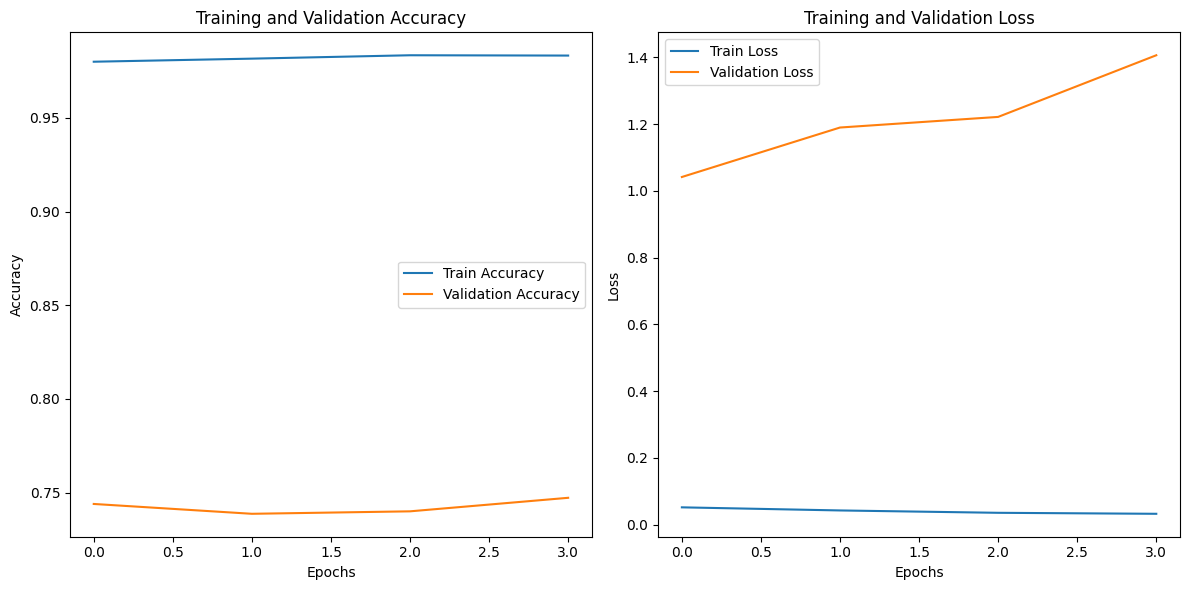

In [ ]:
# Train the model and save the training history
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping], 
    verbose=1
)

# Visualize the training process (accuracy and loss)
visualize_training(history)


### Analysis of the Training and Validation Plots:
1. **Training Accuracy** remains almost constant around 0.75, showing that the model is struggling to improve its performance on the training data.
2. **Validation Accuracy** similarly shows little improvement, indicating that the model is not generalizing well to unseen data.
3. **Training Loss** decreases slightly, while **Validation Loss** increases over epochs, suggesting potential overfitting.
4. The model may benefit from techniques like regularization, dropout, or early stopping to improve generalization.
